In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

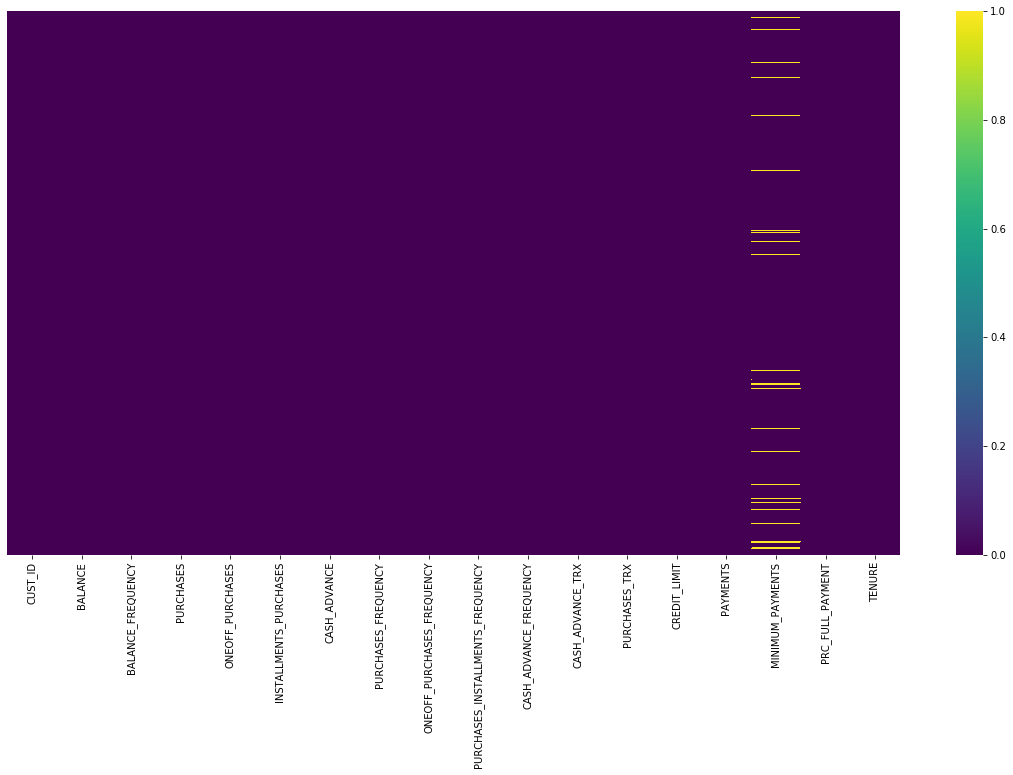

In [3]:
plt.figure(figsize =(20,10))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = True, yticklabels=False) #cbar คือแถบสีด้านชวามือ ถ้า true คือมี

In [0]:
df.fillna(df.median(), inplace=True) #inplace=True คือ การfill missing value ด้วยค่า median ของ column นั้ัน

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
#ตัวแปรที่เข้าmodel ต้องเป็น ืumerical ทั้งหมด ตัด categories ออก หรือเปลี่ยนเป็น dummy variable ทั้งหมด
df.set_index('CUST_ID' , inplace = True) #เปลี่ยน CUST_ID ให้เป็น column แรกแทน ไม่นับเป็น column เพราะ CUST_ID เป็น categorical variable
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
col  = df.columns #ดู column ที่เหลือทั้งหมด
col

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

0 BALANCE
1 BALANCE_FREQUENCY
2 PURCHASES
3 ONEOFF_PURCHASES
4 INSTALLMENTS_PURCHASES
5 CASH_ADVANCE
6 PURCHASES_FREQUENCY
7 ONEOFF_PURCHASES_FREQUENCY
8 PURCHASES_INSTALLMENTS_FREQUENCY
9 CASH_ADVANCE_FREQUENCY
10 CASH_ADVANCE_TRX
11 PURCHASES_TRX
12 CREDIT_LIMIT
13 PAYMENTS
14 MINIMUM_PAYMENTS
15 PRC_FULL_PAYMENT
16 TENURE


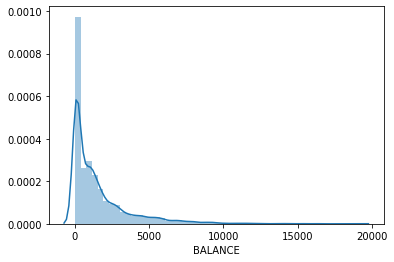

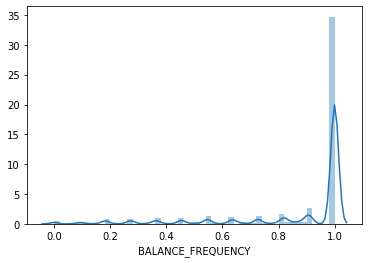

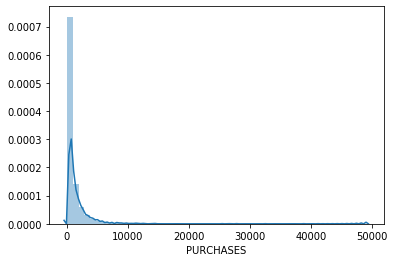

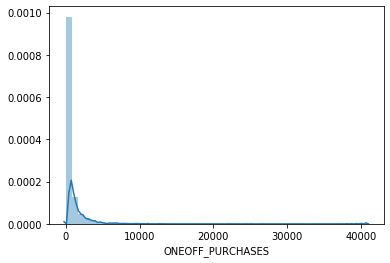

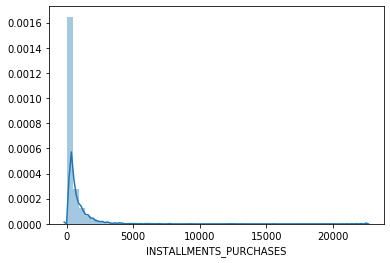

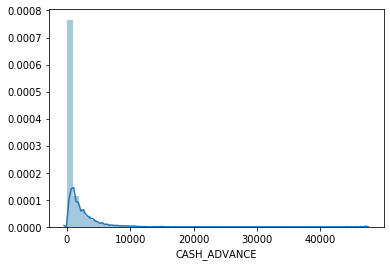

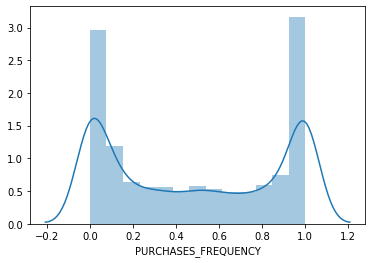

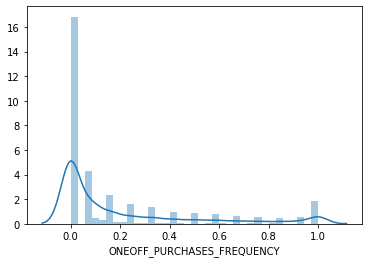

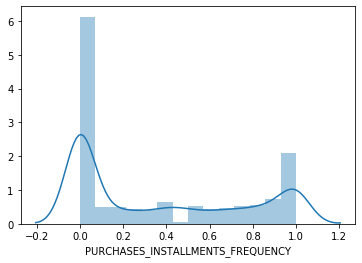

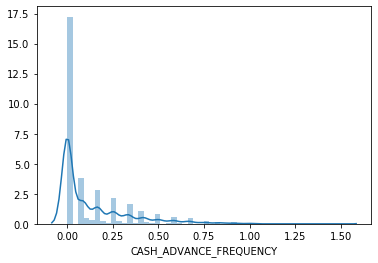

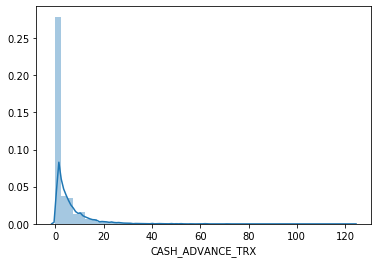

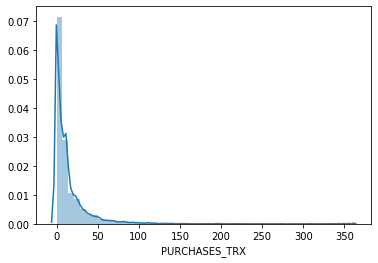

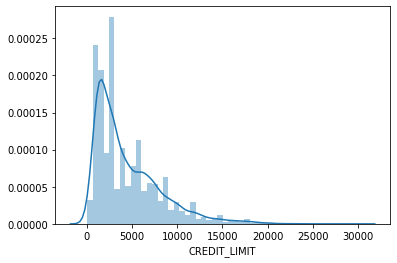

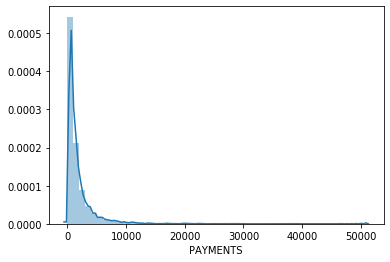

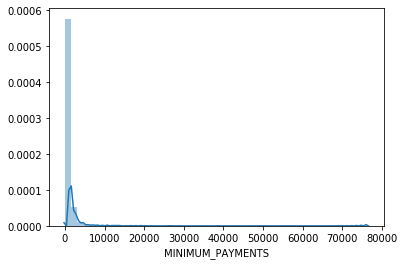

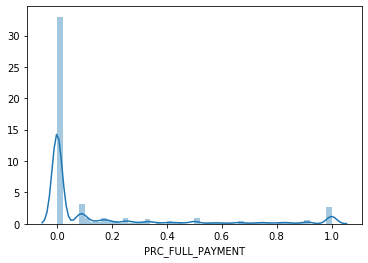

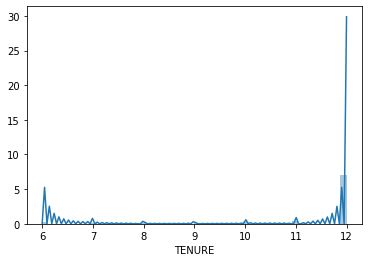

In [8]:
for idx , i in enumerate(col):
    print(idx , i)
    plt.figure(i)
    sns.distplot(df[i])

In [0]:
#standardize ตัวแปร เพื่อให้หน่อยแต่ล่ะตัวแปรเท่ากัน
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
sc.fit_transform(df)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [11]:
#เปลี่ยนจาก numpy array เป็น dataframe
df_sc = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
df_sc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


0 BALANCE
1 BALANCE_FREQUENCY
2 PURCHASES
3 ONEOFF_PURCHASES
4 INSTALLMENTS_PURCHASES
5 CASH_ADVANCE
6 PURCHASES_FREQUENCY
7 ONEOFF_PURCHASES_FREQUENCY
8 PURCHASES_INSTALLMENTS_FREQUENCY
9 CASH_ADVANCE_FREQUENCY
10 CASH_ADVANCE_TRX
11 PURCHASES_TRX
12 CREDIT_LIMIT
13 PAYMENTS
14 MINIMUM_PAYMENTS
15 PRC_FULL_PAYMENT
16 TENURE


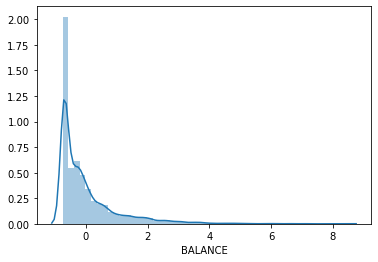

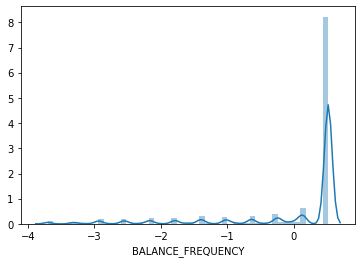

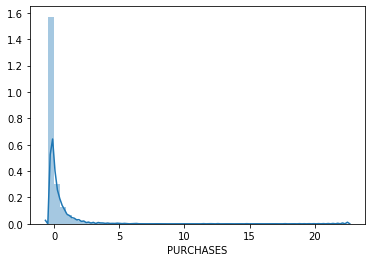

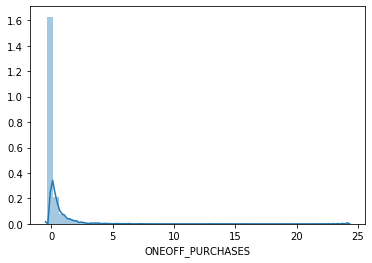

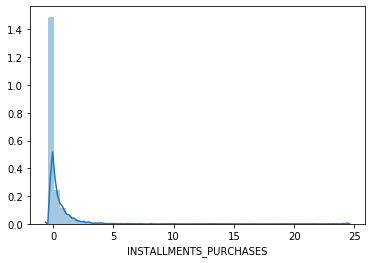

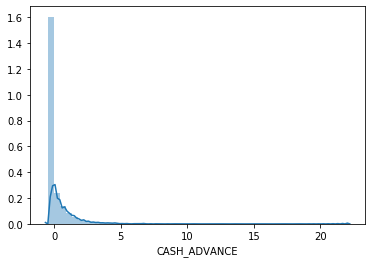

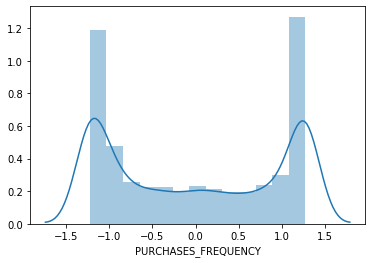

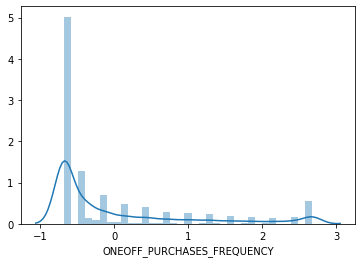

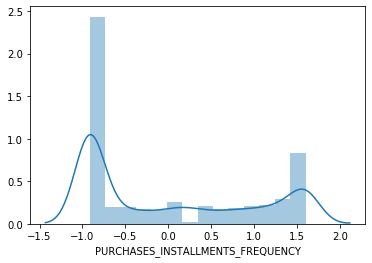

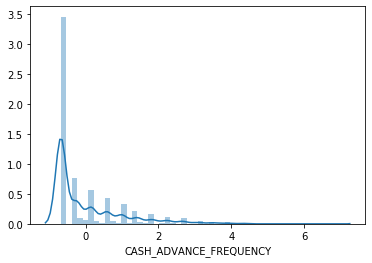

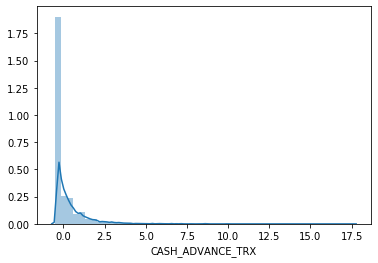

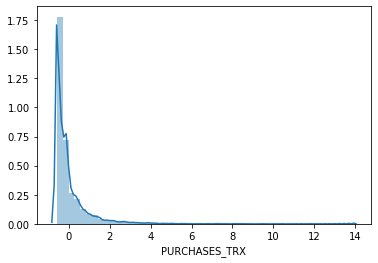

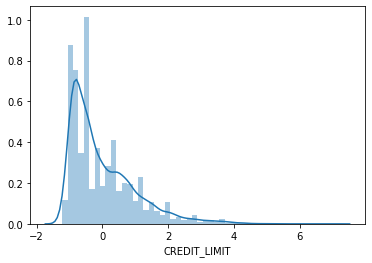

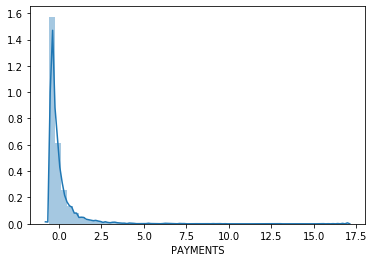

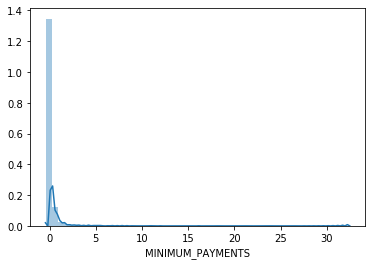

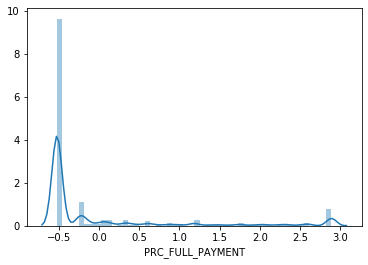

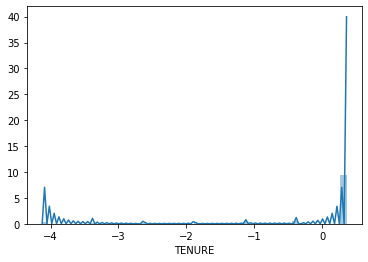

In [12]:
for idx , i in enumerate(col):
    print(idx , i)
    plt.figure(i)
    sns.distplot(df_sc[i])

In [13]:
#เริ่มทำ K-Mean clustering
from sklearn.cluster import KMeans
kmean = KMeans( n_clusters= 8 , random_state= 0 ).fit(df_sc) #n_cluster คือจำนวนครั้งที่จะทำการ run เป็นเท่าไรก็ได้ นิยมเป็น 7
label = kmean.predict(df_sc)
label

array([0, 3, 1, ..., 2, 2, 2], dtype=int32)

In [14]:
#เปลี่ยน label จาก array ให้อยู่ใน column
df['group'] = label
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,group
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


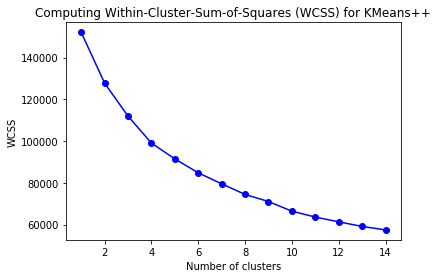

In [15]:
#elbow method จะบอกว่า ตรง n_clusters ควรเป็นเท่าไร วิธีก่อนหน้านี้กำหนดเป็น 8 เลย
# Find optimum k using "elbow method"
# plot error vs k-cluster
# choose the point having hightest slope or minimum distance from origin to the point
# K = 4,5

wcss = [] # wcss = Within-Cluster-Sum-of-Squares
N = range(1, 15) #ให้ n_clusters มีค่าระหว่า 1 ถึง 15
for i in N:
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict(df_sc)
    wcss.append(kmeans.inertia_)
    
plt.plot(N, wcss, 'bo-')
plt.title("Computing Within-Cluster-Sum-of-Squares (WCSS) for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show() # ดูกราฟว่าจากจุด origin ไปจุดไหนใกล้สุดก็ให้ n เป็นเท่านั้น หรือ ดูว่า slop จุดไหนชันสุดก็ได้ ก็จะเป็น initial guess n ที่น่าสนใจ

In [16]:
#RandomForest to Determine Important Variables
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns = 'group')
y = df[['group']]

rfc = RandomForestClassifier(n_estimators= 100 , criterion= 'entropy' ,random_state= 0)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
rfc.fit(X , y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
rfc.predict(X)

array([0, 3, 1, ..., 2, 2, 2], dtype=int32)

In [19]:
pd.DataFrame({'col' : X.columns , 'imp' : rfc.feature_importances_}).sort_values(by='imp', ascending = False) #by='imp', ascending = False คือ เรียง column imp จากค่ามากไปน้อย

,col,imp
6,PURCHASES_FREQUENCY,0.120526
1,BALANCE_FREQUENCY,0.117427
16,TENURE,0.095432
7,ONEOFF_PURCHASES_FREQUENCY,0.095108
11,PURCHASES_TRX,0.090005
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.068906
0,BALANCE,0.066512
5,CASH_ADVANCE,0.048642
2,PURCHASES,0.045234
3,ONEOFF_PURCHASES,0.041785
